In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [6]:
sal=pd.read_csv("Salary_Data.csv")
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
dataset=pd.read_csv("delivery_time.csv")
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


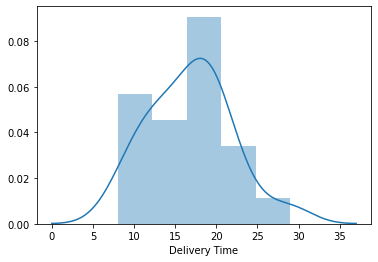

In [9]:
sns.distplot(dataset["Delivery Time"])

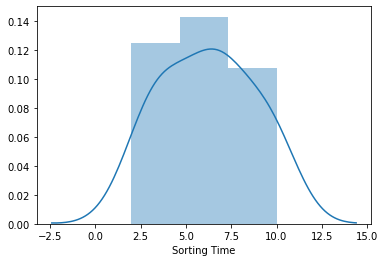

In [10]:
sns.distplot(dataset["Sorting Time"])

In [11]:
dataset.corr() #Positive relation between them as positive values

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


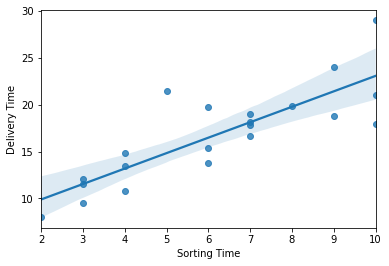

In [12]:
#Regression analysis
sns.regplot(x=dataset["Sorting Time"],y=dataset["Delivery Time"])

In [21]:
dataset = dataset.rename({'Delivery Time': 'delivery_time', 'Sorting Time': 'sorting_time'}, axis=1)

In [22]:
model = smf.ols("delivery_time ~ sorting_time", data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           3.98e-06
Time:                        12:48:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [24]:
#prediction for delivery time
delivery_time = 6.58273 + 1.65 * 5
delivery_time

14.83273

In [25]:
#prediction for sorting time 5,8
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [26]:
#data prediction
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [27]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64